# Project Name: Drugs, Side Effects and Medical Condition

### Made by: T. Swayam Siddhant
### Domain: Data Science

### Step-1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
#Loading the Dataset
df = pd.read_csv('/Users/swayamsiddhant/Documents/DATA SCIENCE/Projects/Unified Mentor (Project-2) Drugs, Side Effects and Medical Condition/Dataset/drugs_side_effects_drugs_com.csv')
print("\n--- First 5 Rows of Dataset ---")
df.head()


--- First 5 Rows of Dataset ---


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [8]:
#Display initial dataset information
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
print("column:")
print(df.columns)

#Showing main information about dataset
print("\n--- Dataset Information ---")
df.info()

The dataset has 2931 rows and 17 columns
column:
Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6 

### Step-2: Data Cleaning and Preprocessing

In [9]:
#Dropping the "Brand Names" column
df.drop(columns = ['brand_names'], inplace = True)
print("\n'brand_names' column dropped.")


'brand_names' column dropped.


In [10]:
#Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]
print(f"\nCount of Duplicate Rows: {duplicate_count}")
if duplicate_count > 0:
    print("Duplicate Rows Found: ")
    print(duplicate_rows)
else:
    print("No Duplicate Rows Found")


Count of Duplicate Rows: 0
No Duplicate Rows Found


In [12]:
#Convert 'rating' and 'number of reviews' attributes to numeric
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'], errors = 'coerce')
print("\nData Types after converting 'rating' and 'no_of_reviews':")
print(df.dtypes.value_counts())


Data Types after converting 'rating' and 'no_of_reviews':
object     14
float64     2
Name: count, dtype: int64


In [13]:
#Convert 'Activity' to float
df['activity'] = df['activity'].astype(str).str.replace(r'\s', '', regex = True).str.rstrip('%').astype('float') / 100
print("\nUpdated 'Activity' column (first 5 rows):")
print(df['activity'].head())


Updated 'Activity' column (first 5 rows):
0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
Name: activity, dtype: float64


In [20]:
#Handle Missing Value
print("\n--- Missing Values Before Handling ---")
print(f"Total missing values in this dataset: {df.isnull().sum().sum()}")
print(f"Number of instances = {df.shape[0]}")
print(f"Number of attributes = {df.shape[1]}")
print("Number of missing values per column:")
for col in df.columns:
    print(f"\t{col}: {df[col].isna().sum()}")


--- Missing Values Before Handling ---
Total missing values in this dataset: 2920
Number of instances = 2931
Number of attributes = 16
Number of missing values per column:
	drug_name: 0
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 0
	rx_otc: 1
	pregnancy_category: 229
	csa: 0
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


In [21]:
#Replace 'Alcohol' Values
df['alcohol'] = df['alcohol'].replace(np.nan, '0')
df['alcohol'] = df['alcohol'].replace({'X' : 1})
df['alcohol'] = pd.to_numeric(df['alcohol']) #Ensuring it is numeric

In [22]:
#Fill null values in 'side_effects' and 'related_drugs' with 'Unknown'
df["side_effects"] = df['side_effects'].fillna('Unknown')
df["related_drugs"] = df['related_drugs'].fillna('Unknown')

In [23]:
#Fill Null Values in 'generic_name' and 'drug_classes' with 'Unknown'
df['generic_name'] = df['generic_name'].replace(np.nan, 'Unknown')
df['drug_classes'] = df['drug_classes'].replace(np.nan, 'Unknown')

In [24]:
#Check Unique values for 'rx_otc' and 'pregnancy_category' before filling
print("\nUnique values for 'rx_otc' before filling NaN: ")
print(df["rx_otc"].unique())
print("\nUnique values for 'pregnancy_category' before filling NaN: ")
print(df["pregnancy_category"].unique())


Unique values for 'rx_otc' before filling NaN: 
['Rx' 'Rx/OTC' 'OTC' nan]

Unique values for 'pregnancy_category' before filling NaN: 
['D' 'C' 'X' 'B' 'N' nan 'A']


In [26]:
#Filling Null Values in 'rx_otc' and 'pregnancy_category' with 'Unknown'
df['rx_otc'] = df['rx_otc'].replace(np.nan, 'Unknown')
df['pregnancy_category'] = df['pregnancy_category'].replace(np.nan, 'Unknown')

In [27]:
#Verify no missing values are left
print("\n--- Missing Values After Handling ---")
print(f"Total missing values in this dataset: {df.isnull().sum().sum()}")
print(f"Number of instances = {df.shape[0]}")
print(f"Number of attributes = {df.shape[1]}")
print("Number of missing values per column: ")
for col in df.columns:
    print(f"\t{col}: {df[col].isna().sum()}")


--- Missing Values After Handling ---
Total missing values in this dataset: 2690
Number of instances = 2931
Number of attributes = 16
Number of missing values per column: 
	drug_name: 0
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 0
	rx_otc: 0
	pregnancy_category: 0
	csa: 0
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


### Step-3: Creating a copy for further preprocessing

In [28]:
#Create a copy for further processing (df_version2)
data_version2 = df.copy()
print("\n--- Head of data_version2 ---")
print(data_version2.head())


--- Head of data_version2 ---
        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines

In [31]:
#Save the processed data to a new CSV File
output_csv_path = 'drugs_side_effects_drugs_com_version2.csv'
data_version2.to_csv(output_csv_path, index = False)
print(f"\nProcessed data saved to {output_csv_path}")

#Read the new version dataset (data_ver3)
data_ver3 = pd.read_csv(output_csv_path)


Processed data saved to drugs_side_effects_drugs_com_version2.csv


In [33]:
#Display unique values for specific columns in data_ver3
print("\nUnique values for 'pregnancy_category' in data_ver3: ")
print(data_ver3["pregnancy_category"].unique())
print("\nUnique values for 'csa' in data_ver3: ")
print(data_ver3["csa"].unique())
print("\nUnique values for 'rx_otc' in data_ver3: ")
print(data_ver3["rx_otc"].unique())
print("\nUnique values for 'generic_name' in data_ver3 (first 10): ")
print(data_ver3["generic_name"].unique()[:10])
print("\nUnique values for 'medical_condition' in data_ver3: ")
print(data_ver3["medical_condition"].unique())


Unique values for 'pregnancy_category' in data_ver3: 
['D' 'C' 'X' 'B' 'N' 'Unknown' 'A']

Unique values for 'csa' in data_ver3: 
['N' '2' '4' 'U' 'M' '5' '3']

Unique values for 'rx_otc' in data_ver3: 
['Rx' 'Rx/OTC' 'OTC' 'Unknown']

Unique values for 'generic_name' in data_ver3 (first 10): 
['doxycycline' 'spironolactone' 'minocycline' 'isotretinoin (oral)'
 'clindamycin topical' 'tretinoin topical'
 'sulfamethoxazole and trimethoprim' 'Retin-A' 'dapsone topical'
 'benzoyl peroxide topical']

Unique values for 'medical_condition' in data_ver3: 
['Acne' 'ADHD' 'AIDS/HIV' 'Allergies' "Alzheimer's" 'Angina' 'Anxiety'
 'Asthma' 'Bipolar Disorder' 'Bronchitis' 'Cancer' 'Cholesterol'
 'Colds & Flu' 'Constipation' 'COPD' 'Covid 19' 'Depression'
 'Diabetes (Type 1)' 'Diabetes (Type 2)' 'Diarrhea' 'Eczema'
 'Erectile Dysfunction' 'Gastrointestinal' 'GERD (Heartburn)' 'Gout'
 'Hair Loss' 'Hayfever' 'Herpes' 'Hypertension' 'Hypothyroidism'
 'IBD (Bowel)' 'Incontinence' 'Insomnia' 'Menopause' 

In [35]:
#Label Encoding for categorical columns
label_encoder = LabelEncoder()
data_ver3["csa"] = label_encoder.fit_transform(data_ver3["csa"])
data_ver3["rx_otc"] = label_encoder.fit_transform(data_ver3["rx_otc"])
data_ver3["generic_name"] = label_encoder.fit_transform(data_ver3["generic_name"])
data_ver3["medical_condition"] = label_encoder.fit_transform(data_ver3["medical_condition"])
data_ver3["pregnancy_category"] = label_encoder.fit_transform(data_ver3["pregnancy_category"])
data_ver3["side_effects"] = label_encoder.fit_transform(data_ver3["side_effects"])

print("\nUnique values for 'generic_name' after Label Encoding:")
print(data_ver3["generic_name"].unique())
print("\nUnique values for 'rx_otc' after Label Encoding:")
print(data_ver3["rx_otc"].unique())
print("\nUnique values for 'csa' after Label Encoding:")
print(data_ver3["csa"].unique())
print("\nUnique values for 'side_effects' after Label Encoding:")
print(data_ver3["side_effects"].unique())
print("\nUnique values for 'medical_condition' after Label Encoding:")
print(data_ver3["medical_condition"].unique())
print("\nUnique values for 'pregnancy_category' after Label Encoding:")
print(data_ver3["pregnancy_category"].unique())


Unique values for 'generic_name' after Label Encoding:
[ 642 1270 1034 ...  729 1157 1259]

Unique values for 'rx_otc' after Label Encoding:
[1 2 0 3]

Unique values for 'csa' after Label Encoding:
[5 0 2 6 4 3 1]

Unique values for 'side_effects' after Label Encoding:
[  15 1972 2697 ... 1647  416 1706]

Unique values for 'medical_condition' after Label Encoding:
[ 2  0  1  3  4  5  6  7  8  9 11 12 13 14 10 15 16 17 18 19 20 21 23 22
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]

Unique values for 'pregnancy_category' after Label Encoding:
[3 2 6 1 4 5 0]


### Step-4: Creating DataFrame

In [38]:
#Create a DataFrame with selected columns for scaling
df = pd.DataFrame(data_ver3, columns = (
                  'generic_name', 'medical_condition', 'no_of_reviews', 'side_effects', 
                  'rating', 'csa', 'pregnancy_category', 'rx_otc', 'alcohol' ))
print("\n---- Head of DataFrame for Scaling (df) ----")
print(df.head(10))


---- Head of DataFrame for Scaling (df) ----
   generic_name  medical_condition  no_of_reviews  side_effects  rating  csa  \
0           642                  2          760.0            15     6.8    5   
1          1270                  2          449.0          1972     7.2    5   
2          1034                  2          482.0          2697     5.7    5   
3           903                  2          623.0          2570     7.9    5   
4           505                  2          146.0          1260     7.4    5   
5          1270                  2            8.0          1971     7.6    5   
6          1335                  2          439.0          1895     7.7    5   
7           903                  2          999.0          2577     8.0    5   
8          1276                  2           96.0          2702     8.5    5   
9           162                  2           86.0          2405     7.9    5   

   pregnancy_category  rx_otc  alcohol  
0                   3       1   

In [40]:
#Standard Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print("\n--- Scaled Data (first few rows) ---")
print(scaled_data[:5])

df_std = pd.DataFrame(scaled_data, columns = df.columns)
print("\n--- Standardized DataFrame (df_std) ---")
print(df_std.head())
print(f"Shape of df_std: {df_std.shape}")


--- Scaled Data (first few rows) ---
[[-0.11111578 -1.43400434  3.70550542 -1.67895444 -0.0055899   0.27417787
   0.28892455 -0.17025661  1.06232778]
 [ 1.50040103 -1.43400434  2.02299235  0.77857901  0.16739692  0.27417787
  -0.43301735 -0.17025661  1.06232778]
 [ 0.89479917 -1.43400434  2.20152267  1.68900914 -0.48130365  0.27417787
   0.28892455 -0.17025661 -0.94132905]
 [ 0.55863882 -1.43400434  2.96433407  1.52952689  0.47012386  0.27417787
   2.45475024 -0.17025661  1.06232778]
 [-0.4626728  -1.43400434  0.38375936 -0.11552616  0.25389033  0.27417787
  -1.15495925 -0.17025661 -0.94132905]]

--- Standardized DataFrame (df_std) ---
   generic_name  medical_condition  no_of_reviews  side_effects    rating  \
0     -0.111116          -1.434004       3.705505     -1.678954 -0.005590   
1      1.500401          -1.434004       2.022992      0.778579  0.167397   
2      0.894799          -1.434004       2.201523      1.689009 -0.481304   
3      0.558639          -1.434004       2.9643

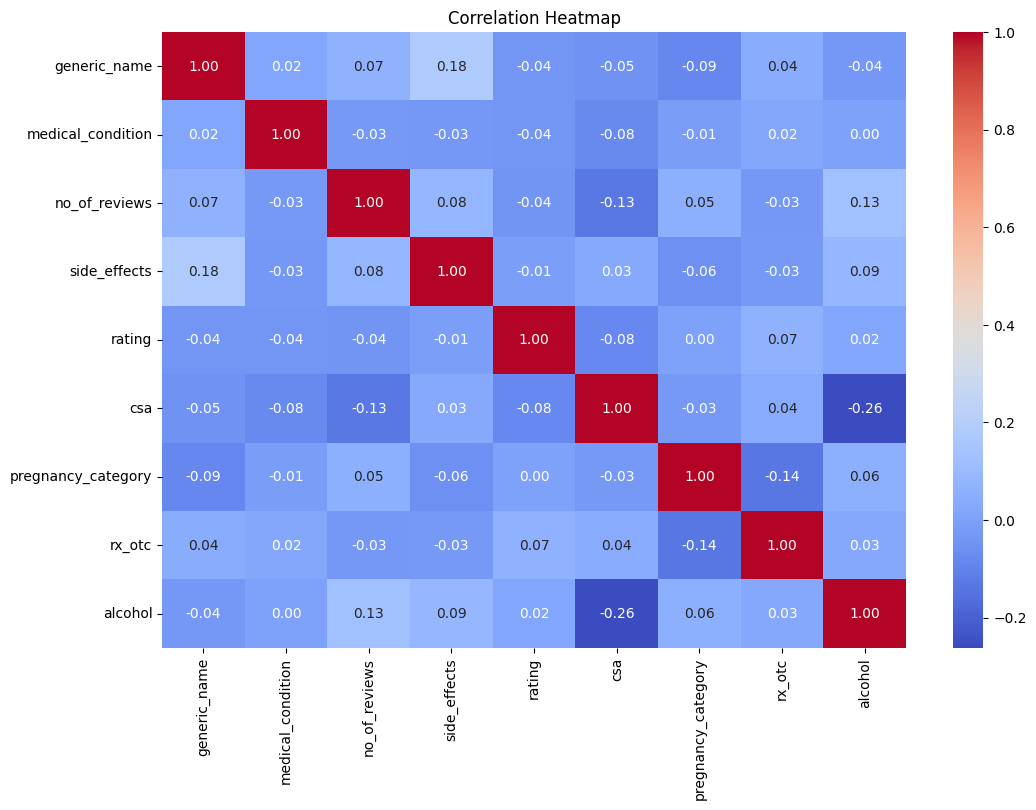

In [41]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

### Step-5: Basic Data Exploration and Analysis

In [42]:
#Medical Condition Analysis
data_ver4 = pd.read_csv(output_csv_path) #Reloading for text processing

medical_condition_counts = data_ver4['medical_condition'].value_counts().sort_values(ascending = False)
print("\nMedical condition occurrence and frequency (sorted from highest to lowest): ")
print(medical_condition_counts)
medical_condition_counts.to_csv('medical_condition_counts.csv')
print("\nMedical condition counts saved to 'medical_condition_counts.csv'")


Medical condition occurrence and frequency (sorted from highest to lowest): 
medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Angina                   71
Bronchitis               71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Anxiety                  45
Cholesterol              45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
Weight Loss              23
COPD    

In [46]:
#Side Effects Analysis
def extract_side_effects(text):
    if pd.isna(text) or text == 'Unknown':
        return []
    return [effect.strip() for effect in re.split(r';', text)]

side_effects_exploded = data_ver4['side_effects'].apply(extract_side_effects).explode()
side_effect_counts = side_effects_exploded.value_counts().sort_values(ascending = False)
print("\nSide effects occurrence and frequency (sorted from highest to lowest): ")
print(side_effect_counts)
side_effect_counts.to_csv('side_effect_count.csv')
print("\nSide effect counts saved to 'side_effect_counts.csv'")


Side effects occurrence and frequency (sorted from highest to lowest): 
side_effects
hives                                                                                                                                                                                                                                                                     1788
difficult breathing                                                                                                                                                                                                                                                       1130
difficulty breathing                                                                                                                                                                                                                                                       450
itching                                                                                              

In [47]:
#Drug Classes Analysis
def extract_drug_classes(text):
    if pd.isna(text) or text == 'Unknown':
        return []
    return [cls.strip() for cls in re.split(r';', text)]

drug_classes_exploded = data_ver4['drug_classes'].apply(extract_drug_classes).explode()
drug_classes_counts = drug_classes_exploded.value_counts().sort_values(ascending = False)
print("\nDrug Classes occurrence and frequency (sorted from highest to lowest): ")
print(drug_classes_counts)
drug_classes_counts.to_csv('drug_classes_counts.csv')
print("\nDrug classes counts saved to 'drug_classes_counts.csv'")


Drug Classes occurrence and frequency (sorted from highest to lowest): 
drug_classes
Upper respiratory combinations                                245
Topical steroids                                               94
Topical acne agents                                            88
Nonsteroidal anti-inflammatory drugs                           70
Miscellaneous topical agents                                   56
                                                             ... 
Mouth and throat products                                       1
Anorexiants, CNS stimulants, Miscellaneous anticonvulsants      1
Skeletal muscle relaxant combinations                           1
Somatostatin and somatostatin analogs                           1
Antigout agents                                                 1
Name: count, Length: 274, dtype: int64

Drug classes counts saved to 'drug_classes_counts.csv'


In [50]:
#Create boolean columns for specific Side Effects
def has_hives(text):
    return 'hives' in text.lower()
data_ver4['Hives'] = data_ver4['side_effects'].apply(has_hives)

def has_difficult_breathing(text):
    return 'difficult breathing' in text.lower() or 'shortness of breath' in text.lower()
data_ver4['Difficult Breathing'] = data_ver4['side_effects'].apply(has_difficult_breathing)

def has_itching(text):
    return 'itching' in text.lower()
data_ver4['Itching'] = data_ver4['side_effects'].apply(has_itching)

#Create boolean columns for specific drug classes
def is_usc(text):
    return 'Upper respiratory combinations' in text
data_ver4['Upper respiratory combinations'] = data_ver4['drug_classes'].apply(is_usc)

def is_steroids(text):
    return 'Topical steroids' in text
data_ver4['Topical steroids'] = data_ver4['drug_classes'].apply(is_steroids)

def is_acne_agent(text):
    return 'Topical acne agents' in text
data_ver4['Topical acne agents'] = data_ver4['drug_classes'].apply(is_acne_agent)

#Create boolean columns for specific medical conditions
def has_pain(text):
    return 'Pain' in text
data_ver4['Pain'] = data_ver4['medical_condition'].apply(has_pain)

def has_cold_and_flu(text):
    return 'Cold and Flu' in text
data_ver4['Cold and Flu'] = data_ver4['medical_condition'].apply(has_cold_and_flu)

def has_acne_condition(text):
    return 'Acne' in text
data_ver4['Acne'] = data_ver4['medical_condition'].apply(has_acne_condition)

### Step-6: Plotting Count for Side Effects

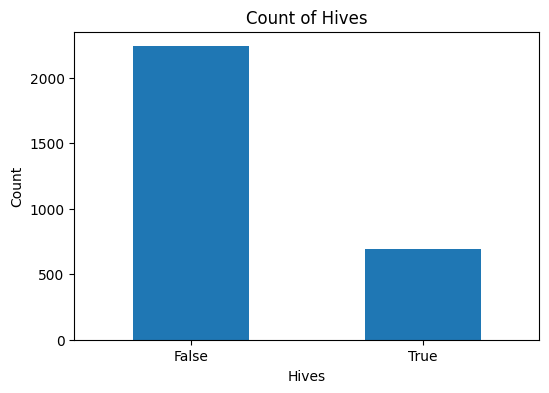

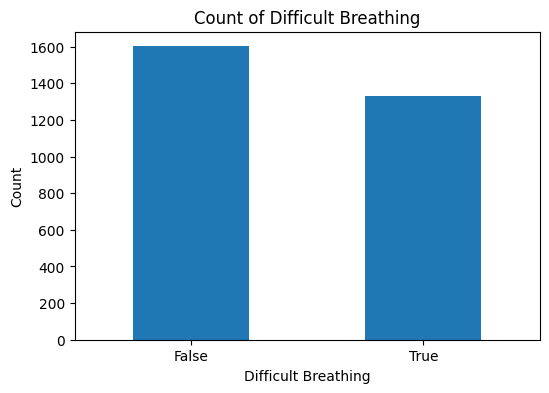

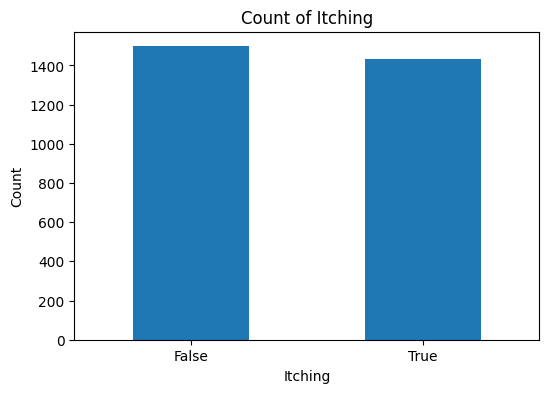

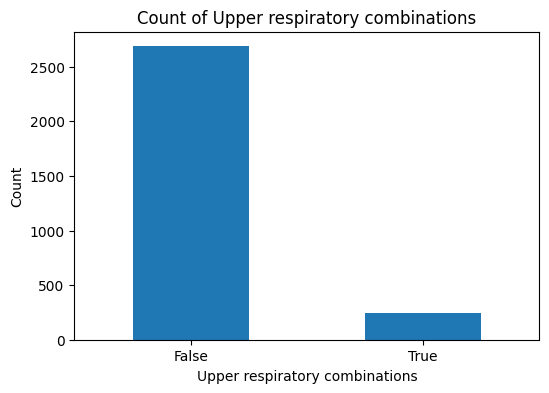

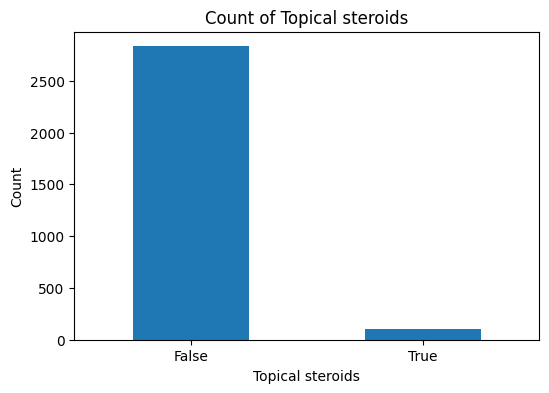

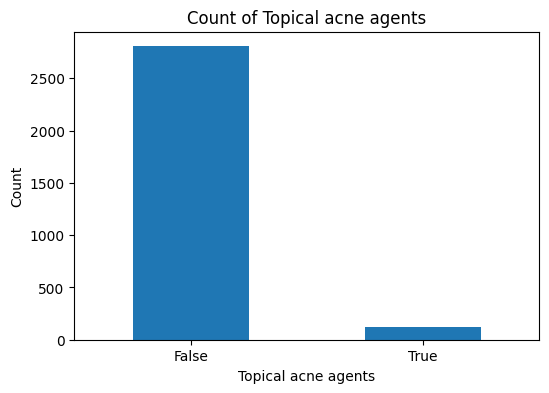

In [56]:
plt.figure(figsize = (6, 4))
data_ver4['Hives'].value_counts().plot(kind = 'bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0,1], ['False', 'True'], rotation = 0)
plt.show()

plt.figure(figsize = (6, 4))
data_ver4['Difficult Breathing'].value_counts().plot(kind = 'bar')
plt.title('Count of Difficult Breathing')
plt.xlabel('Difficult Breathing')
plt.ylabel('Count')
plt.xticks([0,1], ['False', 'True'], rotation = 0)
plt.show()

plt.figure(figsize = (6, 4))
data_ver4['Itching'].value_counts().plot(kind = 'bar')
plt.title('Count of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.xticks([0,1], ['False', 'True'], rotation = 0)
plt.show()

#Plotting counts for Drug Classes
plt.figure(figsize = (6, 4))
data_ver4['Upper respiratory combinations'].value_counts().plot(kind = 'bar')
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0,1], ['False', 'True'], rotation = 0)
plt.show()

plt.figure(figsize = (6, 4))
data_ver4['Topical steroids'].value_counts().plot(kind = 'bar')
plt.title('Count of Topical steroids')
plt.xlabel('Topical steroids')
plt.ylabel('Count')
plt.xticks([0,1], ['False', 'True'], rotation = 0)
plt.show()

plt.figure(figsize = (6, 4))
data_ver4['Topical acne agents'].value_counts().plot(kind = 'bar')
plt.title('Count of Topical acne agents')
plt.xlabel('Topical acne agents')
plt.ylabel('Count')
plt.xticks([0,1], ['False', 'True'], rotation = 0)
plt.show()



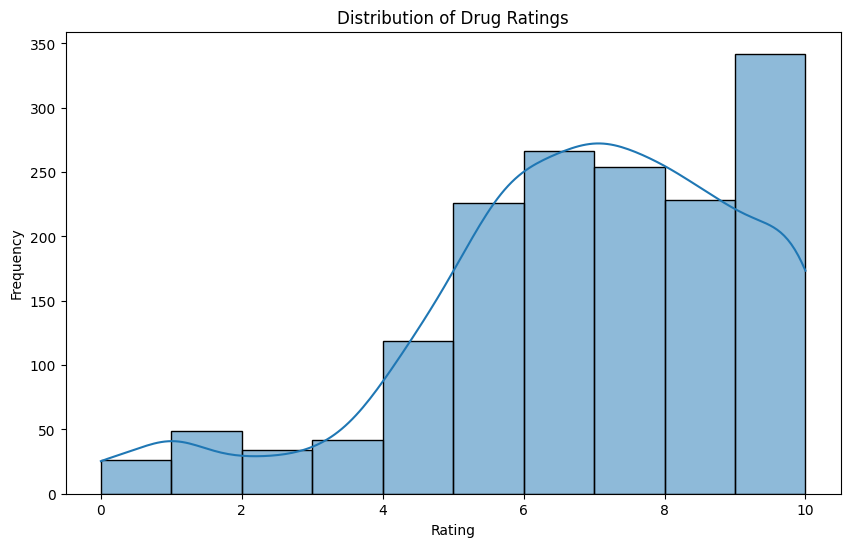


--- Top 10 Drugs by Medical Condition ---
medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


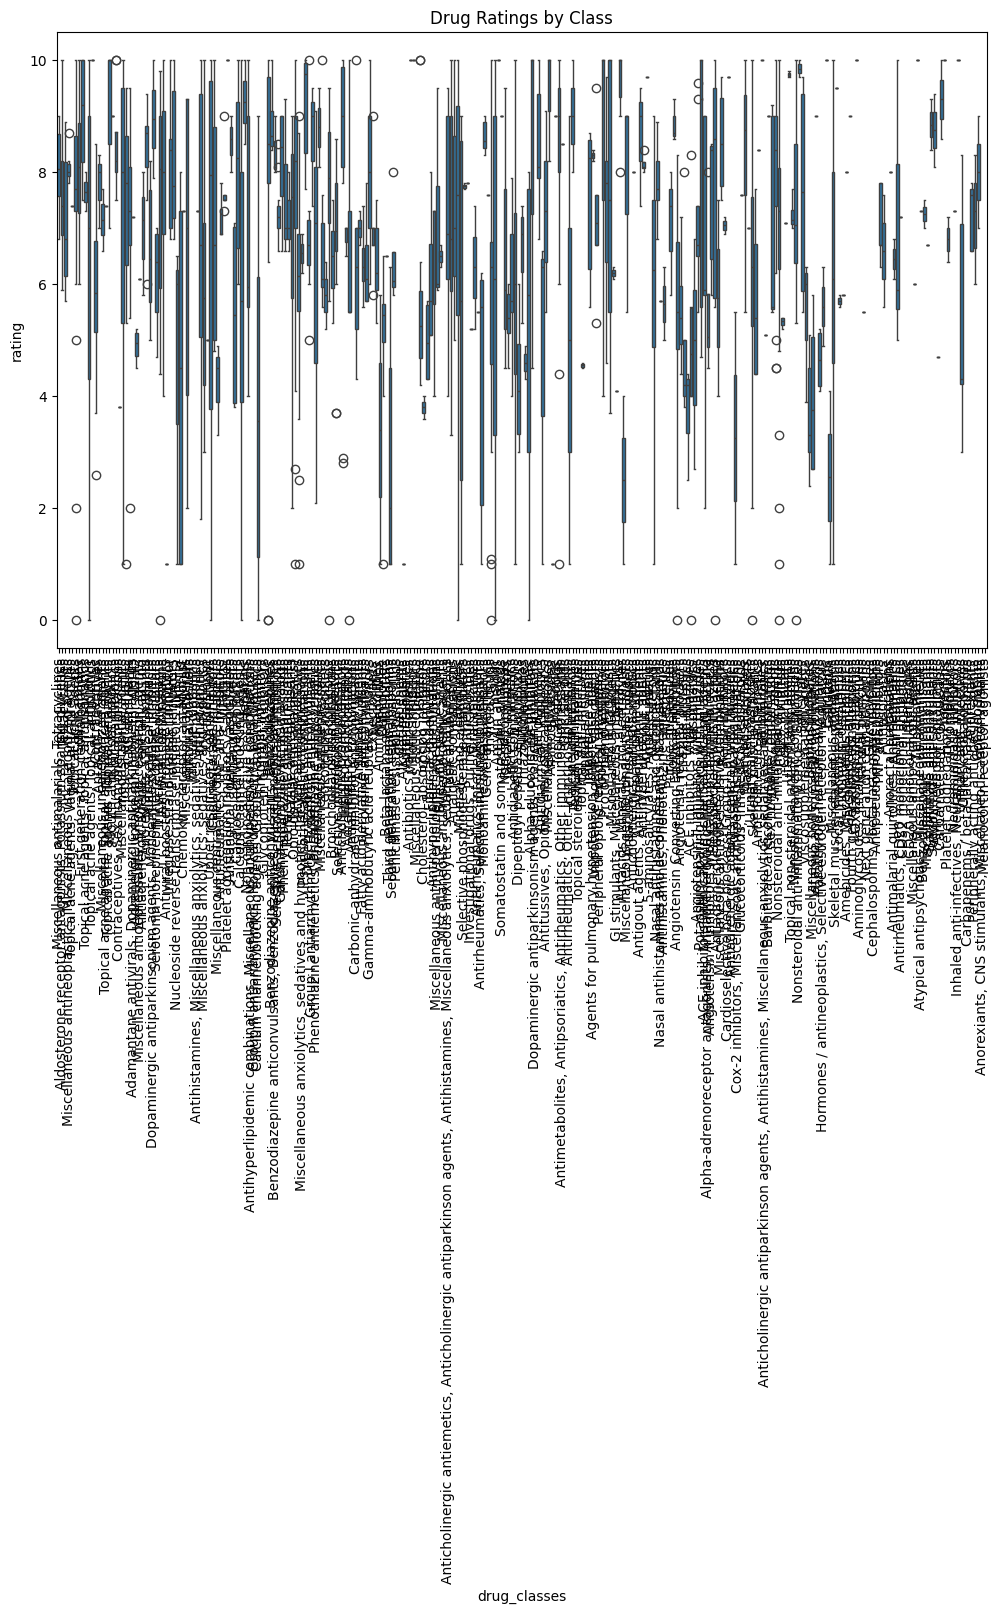

In [60]:
#Example of a distribution plot (as mentioned in the guide)
plt.figure(figsize = (10, 6))
sns.histplot(data_ver4['rating'], bins = 10, kde = True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#Example of Top Drugs by Condition (as mentioned in the guide)
top_drugs_by_condition = data_ver4.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print("\n--- Top 10 Drugs by Medical Condition ---")
print(top_drugs_by_condition)

#Example of Drug Ratings by Class (as mentioned in the guide)
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'drug_classes', y = 'rating', data = data_ver4)
plt.xticks(rotation = 90)
plt.title('Drug Ratings by Class')
plt.show()
